# **Preparing Data for ML**

Whenever we have to create a Machine Learning model, our ultimate goal is to get our result from that model with highest accuracy possible. To achieve this, the first and foremost requirement is that our data, on which we have to train our model should be clean and processed i.e it does not have any missing value, any duplicate value, any categorical data as ML models can only be trained on numerical data.

---

In this project, we will take a dataset **"insurance.csv"**, we will perform EDA, Statistical Analysis, Data Cleaning and Preprocessing and finally Feature Engineering to transform our raw data to a clean, preprocessed data to be used for our ML model. ⚡

# ***Step 1:  Import required packages***

We start by importing necessary packages.

1.   pandas -> Core Data Analysis Package
2.   numpy -> For mathematical and Array Operations (if required)


1.   matplotlib.pyplot -> For Data Visualization
2.   seaborn -> Made over Matplotlib for advance Visualizations





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ***Step 2: Importing the Dataset***

Next step is to import the dataset to our working environment using **pd.read_csv()** method.

In [2]:
df = pd.read_csv('insurance.csv')

# ***Step 3: Exploratory Data Analysis ( EDA )***

Next step is EDA. In EDA, we perform a detailed overview of our dataset.

In [3]:
df.sample(10)  # Random 10 rows from our dataset

,age,sex,bmi,children,smoker,region,charges
893,47,male,38.940,2,yes,southeast,44202.65360
329,52,male,36.700,0,no,southwest,9144.56500
726,41,male,28.405,1,no,northwest,6664.68595
573,62,female,36.860,1,no,northeast,31620.00106
1213,52,female,33.300,2,no,southwest,10806.83900
1060,24,male,32.010,0,no,southeast,1981.58190
972,22,female,20.235,0,no,northwest,2527.81865
1215,18,male,39.140,0,no,northeast,12890.05765
1063,36,male,28.595,3,no,northwest,6548.19505
670,30,male,31.570,3,no,southeast,4837.58230


In [4]:
df.shape # Count of Rows and Columns

(1338, 7)

In [5]:
df.info() # General Information of our dataset i.e Columns names, columns data type, # Missing values count etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe() # It returns a statistical summary of numerical columns in our dataset.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum() # It returns the missing value count per column.

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.duplicated().sum() # It return count of duplicated values if any.

np.int64(1)

### **EDA: Data Visualization**

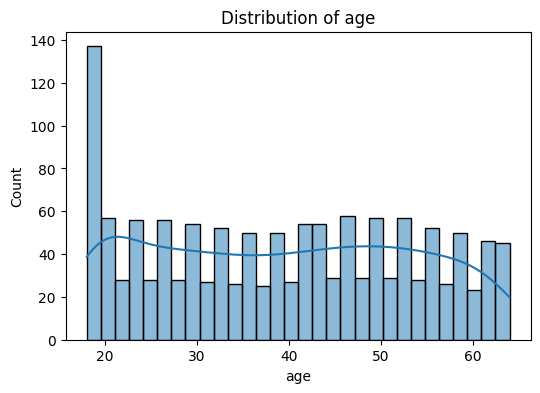

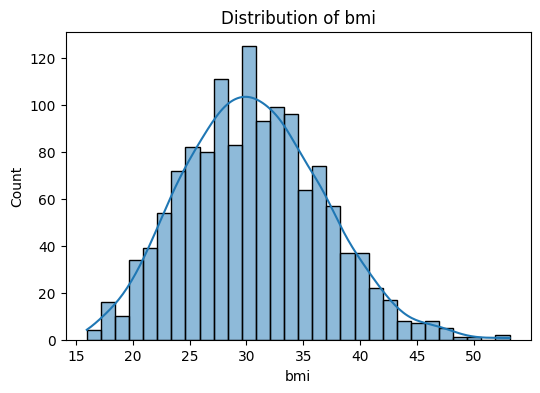

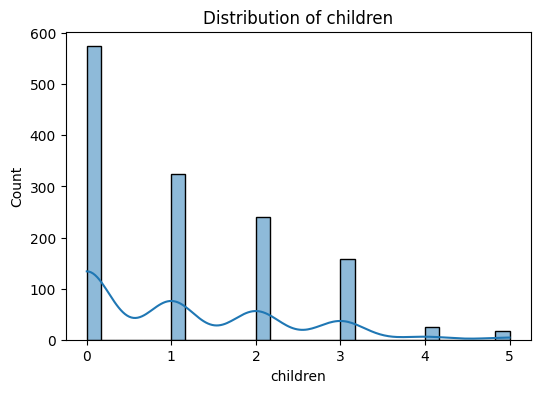

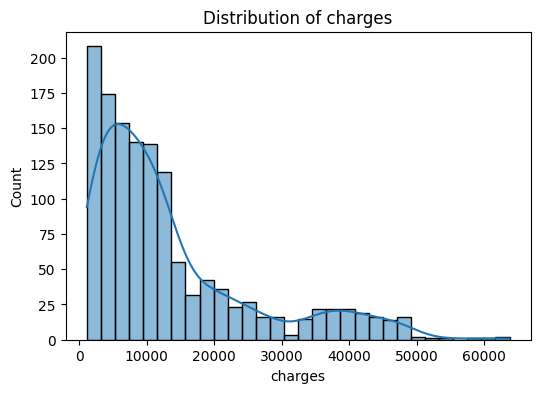

In [9]:
numeric_columns = ['age', 'bmi', 'children', 'charges'] # Taking 4 columns

# Using for-loop to create a histogram of each column
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f'Distribution of {col}')
  plt.show()

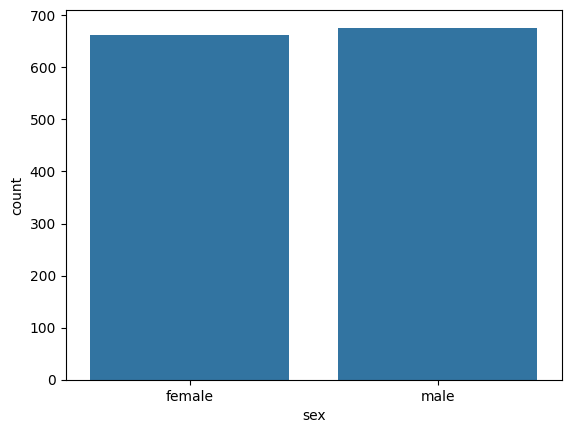

In [10]:
sns.countplot(x = df['sex']) # Countplot for Genders
plt.show()

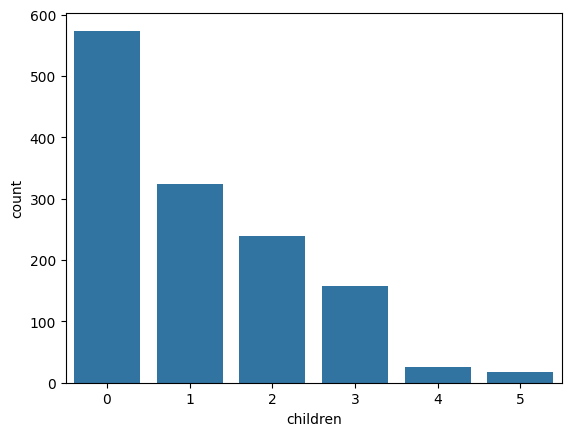

In [11]:
sns.countplot(x = df['children']) # Countplot for children
plt.show()

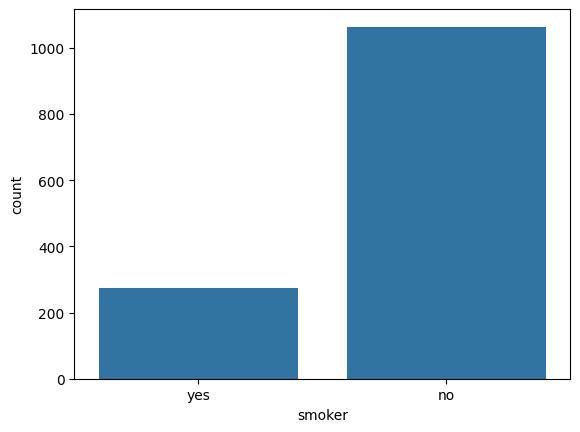

In [12]:
sns.countplot(x = df['smoker']) # Countplot for smokers
plt.show()

### **EDA : Detecting Outliers**

Detecting Outliers is a very important step in EDA. To detect outliers, we generally use Boxplot. It returns 5-number summary. Any point outside this 5-numbers summary is an outlier.

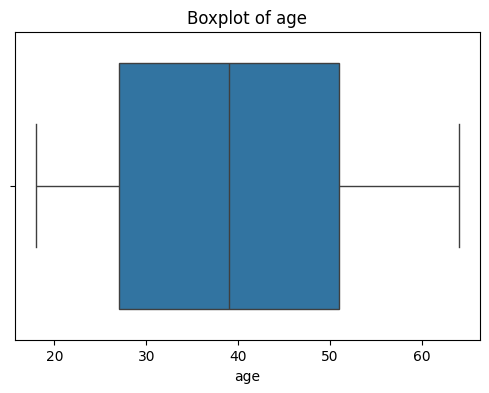

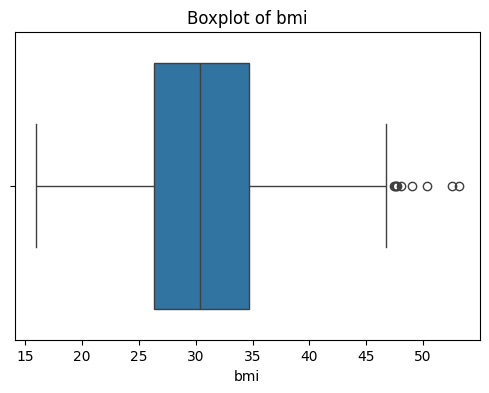

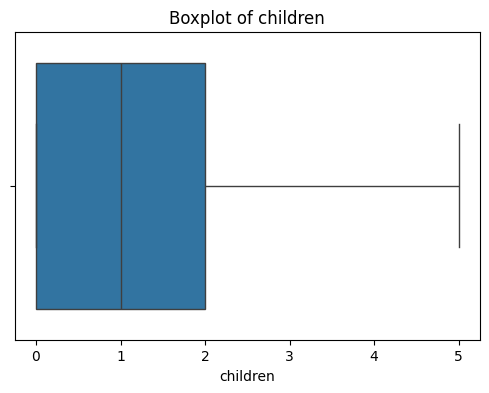

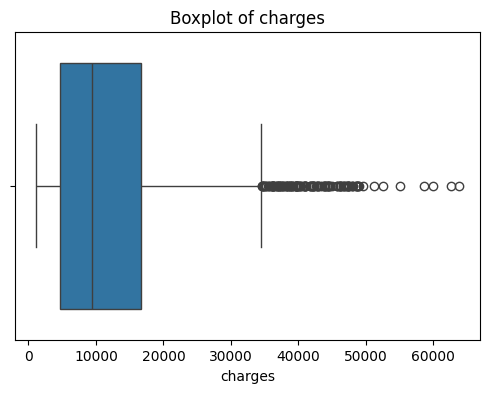

In [13]:
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x = df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

### **EDA : Correlation Matrix**

Correlation Matrix, generally a heatmap, is used to determine the correlation between different columns. It is a very important step as Correlation Matrix helps us to determine which columns we should keep and which ones we should discard.

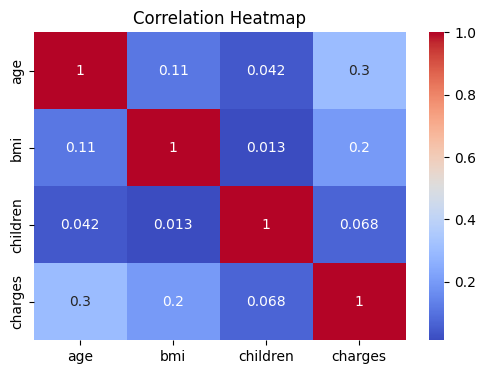

In [14]:
plt.figure(figsize=(6, 4))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ***Step 4: Data Cleaning and Preprocessing***

After EDA, next step is to clean and preprocess data. One standard practice is to make a copy of our dataset and storing it to a new dataframe. This step is performed to ensure that our original dataframe remains unchanged in case our data analysis goess wrong and we need i again. We will perform all next steps on tha new dataframe and keep the original.

In [15]:
df_new = df.copy() # Making a copy of original dataframe and storing to new.

In [16]:
df_new.sample(5) # Checking random 5 rows to verify that it is same as original.

,age,sex,bmi,children,smoker,region,charges
147,51,female,37.730,1,no,southeast,9877.60770
1082,38,male,19.950,1,no,northwest,5855.90250
937,39,female,24.225,5,no,northwest,8965.79575
747,19,male,21.755,0,no,northwest,1627.28245
1133,52,female,18.335,0,no,northwest,9991.03765


In [17]:
df_new.isnull().sum() # Checking null value count again.

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [18]:
df_new.duplicated().sum() # Checking duplicate value count again.

np.int64(1)

In [19]:
df_new.drop_duplicates(inplace=True) # Removing duplicate now if detected.

In [20]:
df_new.shape # Checking count again to see if duplicates are removed.

(1337, 7)

### ***Feature Encoding***

We know that we can't train our model on categorical data. If our dataset have a categorical data, then we use two approaches. One is to discard all those columns with categorical data. But sometimes we want to keep those columns as well and train our model on them as model can train better if we have as much information as possible. There came the second approach called **"Feature Encoding"** where we covert our categorical columns to numerical columns. We can do it using **Label Encoding** and **One-Hot encoding**. For example, the sex and smoker columns of our dataset has only two possible values, so we can covert it into 0's and 1's. This is called **Binary Encoding** ( a type of Label Encoding ). Similarly, region column has 4 possible values, so we will perform One-Hot encoding on it. It will convert region column to four columns based on the values and assigning true & false to those columns.

In [21]:
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df_new['sex'] = df_new['sex'].map({'male': 0, 'female': 1}) # Using map fnction to convert values assinging Male - 0 and Female - 1.
df_new['smoker'] = df_new['smoker'].map({'yes': 1, 'no': 0}) # Similalry assinging Yes (smoker) - 0 and No (non-smoker) - 1.

In [23]:
df_new.head() # Checking first 5 rows to see if our encoding worked

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


As you can see that our sex and smoker columns have been converted from categorical to numeric data type. Let's rename these columns name for the sake of our convenience.

In [24]:
df_new.rename(columns={
    'sex' : 'is_female',
    'smoker' : 'is_smoker'
}, inplace=True)

In [25]:
df_new.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


You can see that columns names have been changed.


---

Now we have just one column remaining in categorical form which is 'region'. To covert it, first we have to check how many possible categories are in this column. we use .value_counts() function for this purpose.

In [26]:
df_new['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


So we can see that it has 4 categories.

---

Now, we will use pd.get_dummies() method, passing our dataset and targeted column as arguments, to perform one-hot encoding.

In [27]:
df_new = pd.get_dummies(df_new, columns=['region'])

In [28]:
df_new.head() # Printing first 5 rows.

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


Now you can see that our one region column is converted to 4 columns where each is a category from region columns. One-hot encoding has assigned True to every column which was the category in 'region' column and assigning all other False.


---

However, one job still remains. All new columns are categorical now. We will convert them to numerical datatype simply by converting whole dataset into one single datatype, **integer**. It will automatically assign False 0 and True 1.

In [29]:
df_new = df_new.astype('int') # Converting Data Type

In [30]:
df_new.head() # Checking if all our data is converted to integer datatype.

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


Let's go, as you can see, all our dataset is converted to integer data type.

### ***Feature Engineering***

Sometimes, we want to create some additional columns from an original column in our dataset. This is called Feature Engineering. Foe example, we have a column called 'bmi'. We can create a new column called 'bmi_category' to divide bmi into categories like Overwight, Underweight etc.

In [31]:
df_new['bmi_category'] = pd.cut(
    df_new['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
    )

In [32]:
df_new.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


So we have successfully created a new column. Now again as this column has 4 categories, we will again perform one-hot encoding and then converting into Integer data type.

In [33]:
df_new = pd.get_dummies(df_new, columns=['bmi_category']) # One-Hot Encoding

In [34]:
df_new = df_new.astype('int') # Conversion

In [35]:
df_new.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


### ***Feature Scaling***

Our data usually have columns with large value ranges, if we train our model on such data, it will ignore the values and columns with small ranges. To overcome this, we use **Feature Scaling**. It transforms our numerical Features so that they all exist in a specific range generally -1 to 1.

In [36]:
'''
For this purpose, we use Scikit-learn module.
'''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['age', 'bmi', 'children']

df_new[cols] = scaler.fit_transform(df_new[cols])

In [37]:
df_new.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


So as you can see our columns are now scaled within range -1 to 1.

### ***Statistical Feature Extraction ( Feature Selection )***

One final step is to select features from our dataset based on their correlation with our target feature. For this we use two statistical approaches. Pearson Correlation Coefficient and Chi-Square test. To use these methods, we will use SciPy ( Scientific Python ) module which is build over NumPy ( Numerical Python ).

Note: It is done using AI
---


Pearson Correlation Coefficient tells us how much a column is linearly correlated to another column, which in this case is our target column,  ranging between -1 (minimum) to 1(maximum).

In [38]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df_new[feature], df_new['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


Second approach is Chi-square test. In this process, we determine p-value for all our columns ( features ). Then we compare it to a constant value i.e alpha. This help us finally determine which feature to keep and which feature to discard from our dataset.

In [39]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [40]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_new['charges_bin'] = pd.qcut(df_new['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_new[col], df_new['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


As you can see above, that both these statistical approaches have helped us determine that 4 features don't have any affect on our target variable and are OK tobe dropped.

# ***Step 5 : Finalizing our DataFrame***

Now let's create one final dataframe from our previous dataframe but with only those columns ( features ) that matter while other are discarded.

In [41]:
final_df = df_new[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese']]

In [42]:
final_df.sample(10) # Checking random 10 rows of our final dataset.

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
258,0.838934,0,-1.008155,2.409936,0,11520,0,0
806,0.055407,1,1.769680,-0.079442,0,28476,0,1
50,-1.511647,1,0.789267,-0.909234,0,2211,0,1
1172,1.195083,1,1.769680,-0.909234,0,11093,1,1
932,0.482785,0,-0.844753,3.239729,0,10096,0,0
853,0.981393,1,-1.171557,0.750351,0,11729,0,0
691,0.554015,0,0.952670,-0.079442,0,8068,0,1
63,-0.799350,1,-0.844753,-0.079442,0,4133,0,0
941,0.767704,1,2.586690,-0.079442,0,9549,1,1
1203,0.838934,0,0.299061,-0.079442,0,9964,0,1


In [43]:
df  # Checking our original dataset which we imported in the very beginning.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# ***Conclusion***

Now you can compare finalized dataset with the original dataset. You can see there is a huge difference in them.


---

If you are wondering that why didn't we performed any action on **'charges'** column. It is because 'charges' column is our target feature that we will use our model to predict. We can't do anything like encoding, scaling etc to our target variable so that our model can best understand the pattern and then predict the accurate values.


---


Now our data is fully prepared for the training of a Machine Learning model and hopefully our model can best predict thw output with maximum accuracy.

Happy Learning ...... 👼